In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Cargar y preparar el dataset

In [4]:
# Cargar el dataset de números escritos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar las imágenes (escala 0-255 a 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convertir las etiquetas a una representación categórica (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Crear la arquitectura de la red neuronal


In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),    # Aplanar las imágenes de 28x28 píxeles a 784
    Dense(128, activation='relu'),    # Capa oculta con 128 neuronas y activación ReLU
    Dense(64, activation='relu'),     # Otra capa oculta con 64 neuronas
    Dense(10, activation='softmax')   # Capa de salida con 10 neuronas (una para cada dígito)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compilar el modelo

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el modelo

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8600 - loss: 0.4829 - val_accuracy: 0.9613 - val_loss: 0.1356
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9643 - loss: 0.1181 - val_accuracy: 0.9619 - val_loss: 0.1249
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9760 - loss: 0.0776 - val_accuracy: 0.9724 - val_loss: 0.0879
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9835 - loss: 0.0528 - val_accuracy: 0.9690 - val_loss: 0.1041
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9866 - loss: 0.0424 - val_accuracy: 0.9713 - val_loss: 0.1020
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9896 - loss: 0.0320 - val_accuracy: 0.9754 - val_loss: 0.0910
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.9770 - val_loss: 0.0888
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9924 - loss: 0.023

## Evaluar el modelo

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.1073
Precisión en el conjunto de prueba: 0.98


## Mostrar imagenes del modelo antes de predecir

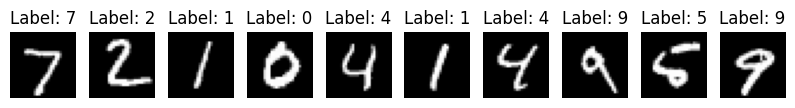

In [35]:
# Cantidad de imágenes a mostrar
num_images = 10
plt.figure(figsize=(10, 2))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i], cmap='gray')  # Mostramos la imagen en escala de grises
    plt.title(f'Label: {np.argmax(y_test[i])}')  # Etiqueta real de la imagen
    plt.axis('off')

plt.show()

## Hacer predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


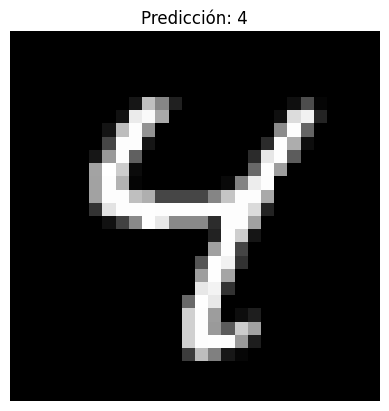

In [34]:
# Índice de la imagen en el conjunto de prueba
img_index = 6
image = x_test[img_index].reshape(1, 28, 28)  # Redimensionar la imagen para predicción
predicted_label = np.argmax(model.predict(image))

# Mostrar la imagen con su etiqueta predicha
plt.imshow(x_test[img_index], cmap='gray')
plt.title(f'Predicción: {predicted_label}')
plt.axis('off')
plt.show()